# Introduction

Semantic search has long been a critical component in the technology stacks of giants as it unlocks an essential recipe to many products and applications, the scope of which is unknown but already broad.
At the core it allows for much more expressive searches, so being able to state a query in natural way as it mimics how we think naturally, it opens up new ways to group similar content in a more semantic way and we are able to discover ralated content, that maybe at surface don't seems related but with Semantic search we could open up way new possibilities of surfacing new results, and insights.

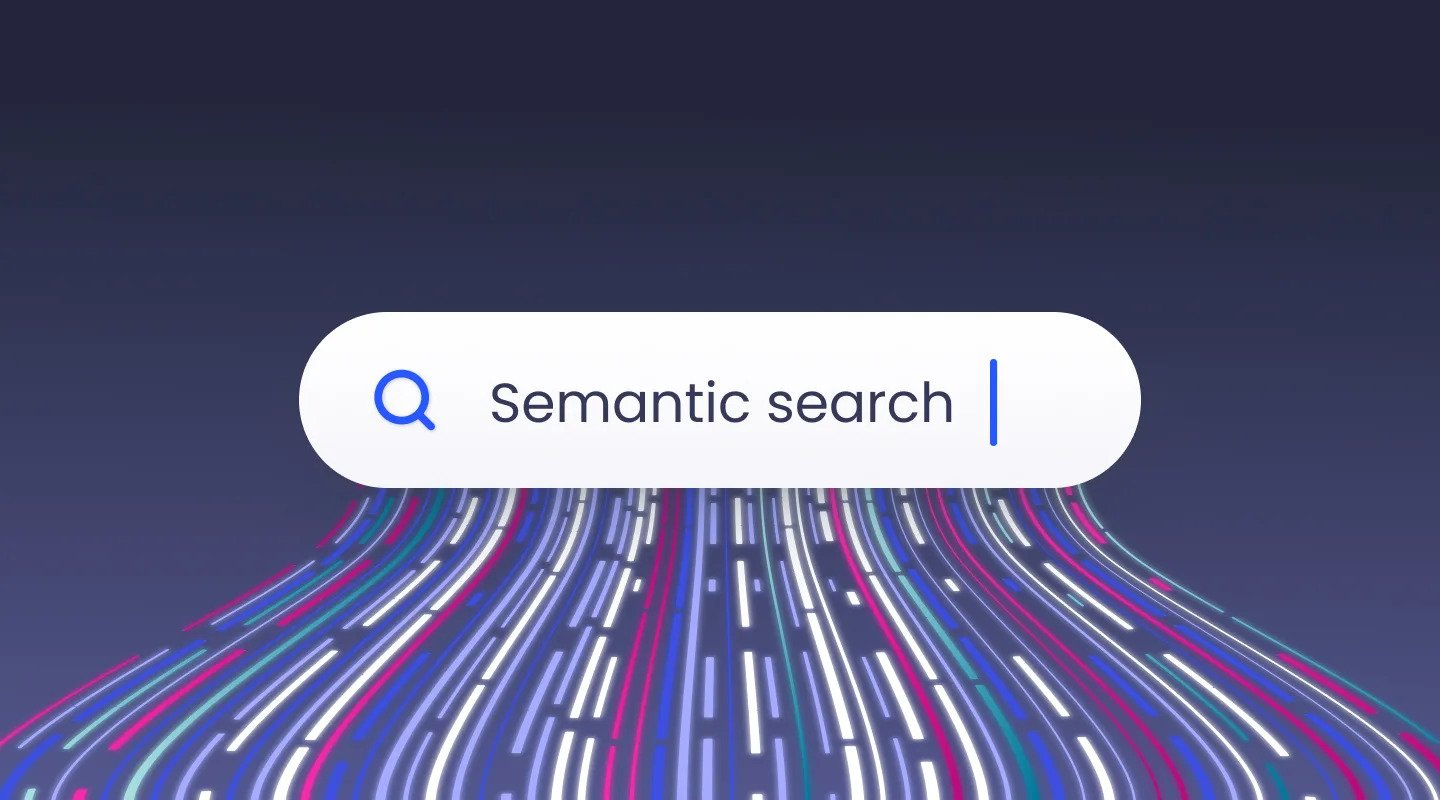

**Semantic search:** where it instead of the focuing on correct lexical match in a query, it focus on the actual meaning of the query/sentence and it is based on their “semantic” content.

"Semantic search means understanding the intent behind the query and representing the “knowledge in a way suitable for meaningful retrieval,” according to Towards Data Science.

There are two pillars support semantic search; vector search and NLP. In this work, we focus on the pillar of NLP and how it brings ‘semantic’ to semantic search using Sentence Transformers.

#A Brief Timeline of NLP from Recurrent Netowoks to Transformers:

Before we dive into sentence transformers, it might help to piece together why transformer embeddings are so much richer — and where the difference lies between a vanilla transformer and a sentence transformer.

*   Transformers are indirect descendants of the previous RNN models. These old recurrent models were typically built from many recurrent units like LSTMs or GRUs.

1.   In machine translation, we would find encoder-decoder networks. The first model for encoding the original language to a context vector, and a second model for decoding this into the target language.
Figure: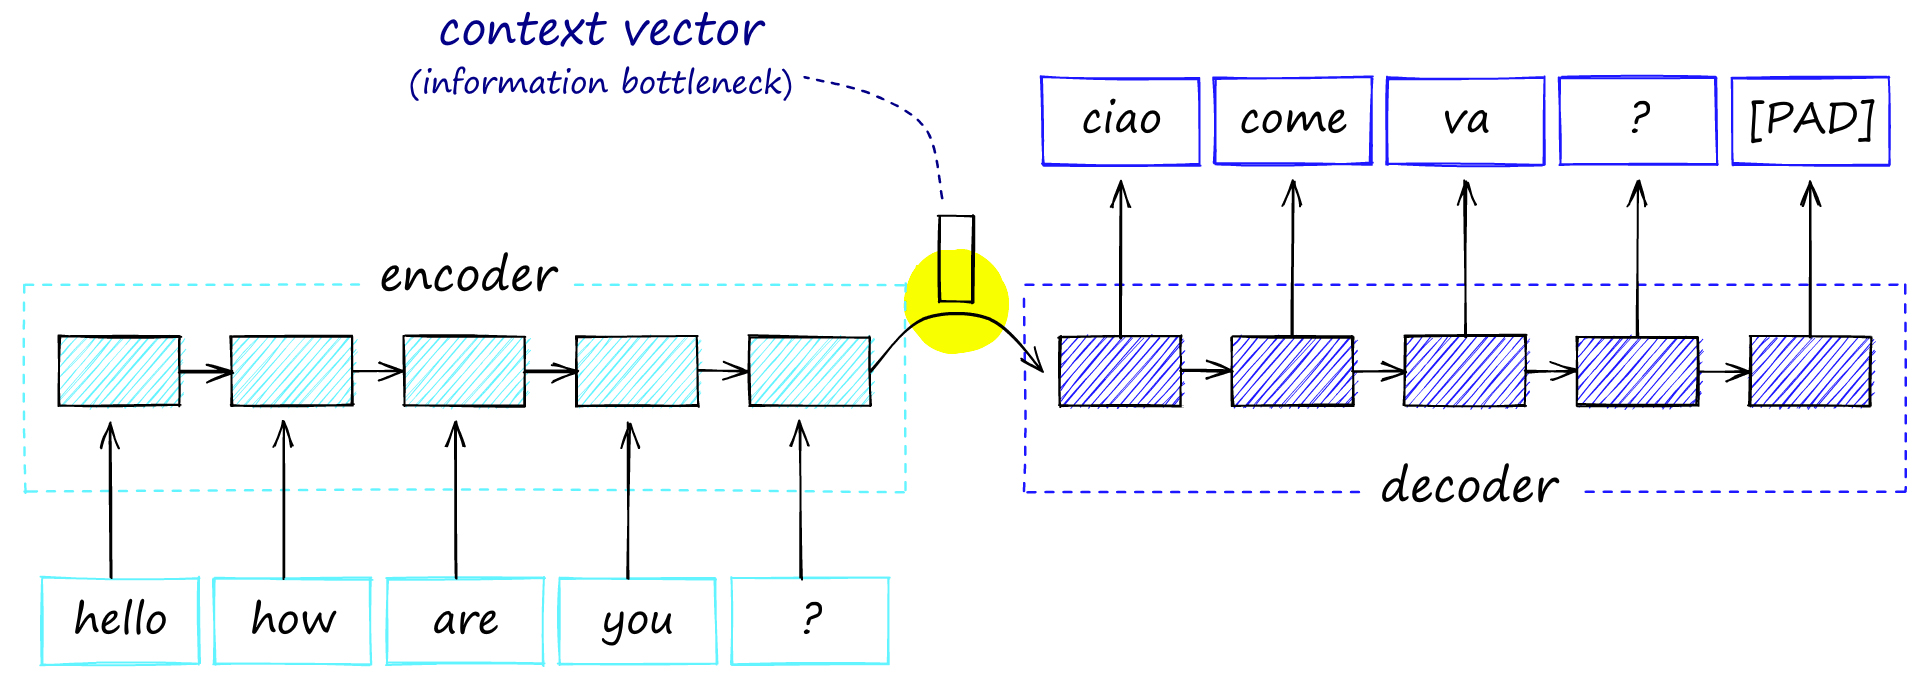
2.   Encoder-decoder architecture with the single context vector shared between the two models, this acts as an information bottleneck as all information must be passed through this point.

The problem here is that we create an information bottleneck between the two models. We’re creating a massive amount of information over multiple time steps and trying to squeeze it all through a single connection. This limits the encoder-decoder performance because much of the information produced by the encoder is lost before reaching the decoder.

**Attention mechanism:** The attention mechanism provided a solution to the bottleneck issue. It offered another route for information to pass through. Still, it didn’t overwhelm the process because it focused attention only on the most relevant information.

*   By passing a context vector from each timestep into the attention mechanism (producing annotation vectors), the information bottleneck is removed, and there is better information retention across longer sequences.
Figure: 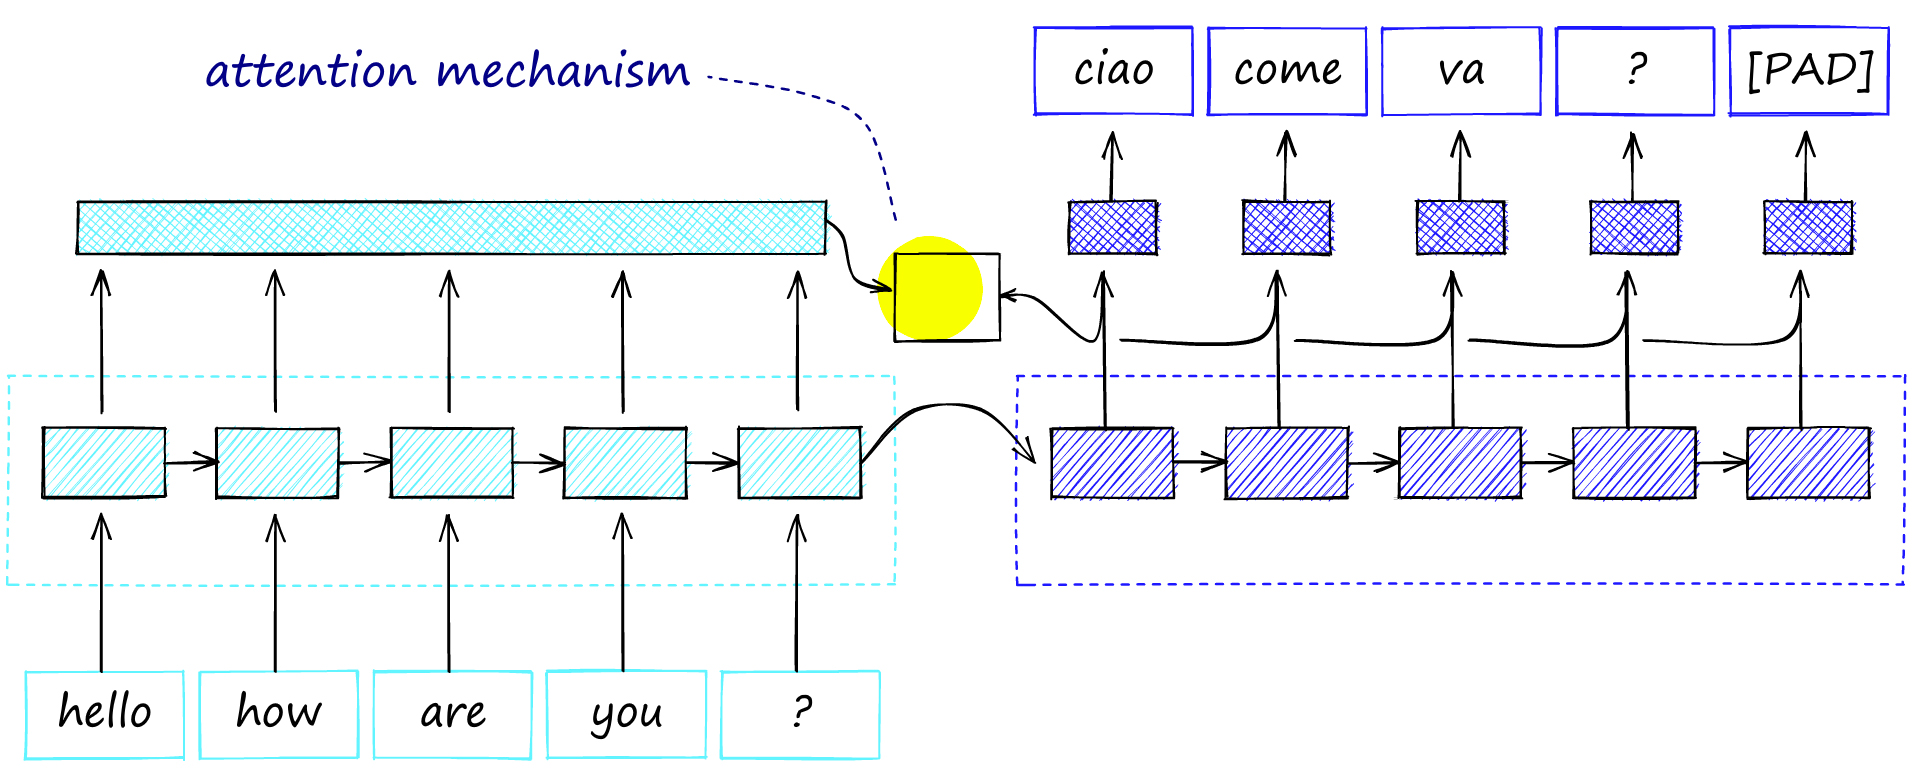
*   During decoding, the model decodes one word/timestep at a time. An alignment (e.g., similarity) between the word and all encoder annotations is calculated for each step.
*    Higher alignment resulted in greater weighting to the encoder annotation on the output of the decoder step. Meaning the mechanism calculated which encoder words to pay attention to.

The best-performing RNN encoder-decoders all used this attention mechanism.


# A vanilla Transformer

In 2017, a paper titled Attention Is All You Need was published. This marked a turning point in NLP. The authors demonstrated that we could remove the RNN networks and get superior performance using just the attention mechanism — with a few changes.

This new attention-based model was named a ‘transformer’. Since then, the NLP ecosystem has entirely shifted from RNNs to transformers thanks to their vastly superior performance and incredible capability for generalization.

The first transformer removed the need for RNNs through the use of three key components:

1.   Positional Encoding
2.   Self-attention
3.   Multi-head attention

*   Positional encoding replaced the key advantage of RNNs in NLP — the ability to consider the order of a sequence (they were recurrent). It worked by adding a set of varying sine wave activations to each input embedding based on position.

*   Self-attention is where the attention mechanism is applied between a word and all of the other words in its own context (sentence/paragraph). This is different from vanilla attention which specifically focused on attention between encoders and decoders.

*   Multi-head attention can be seen as several parallel attention mechanisms working together. Using several attention heads allowed the representation of several sets of relationships (rather than a single set).


**Pretrained Models**

With transformer models, it is possible to use the same ‘core’ of a model and simply swap the last few layers for different use cases (without retraining the core). One of the most widely used of these pretrained models is BERT, or Bidirectional Encoder Representations from Transformers by Google AI.


# A vanilla Transformer vs a Sentence Transformer

*  These transformer models had one issue when building sentence vectors: Transformers work using word or token-level embeddings, not sentence-level embeddings.

*  Before sentence transformers, the approach to calculating accurate sentence similarity with BERT was to use a cross-encoder structure. This meant that we would pass two sentences to BERT, add a classification head to the top of BERT — and use this to output a similarity score.

*   The BERT cross-encoder architecture consists of a BERT model which consumes sentences A and B. Both are processed in the same sequence, separated by a [SEP] token. All of this is followed by a feedforward NN classifier that outputs a similarity score.

BERT for Sentence Similarity: 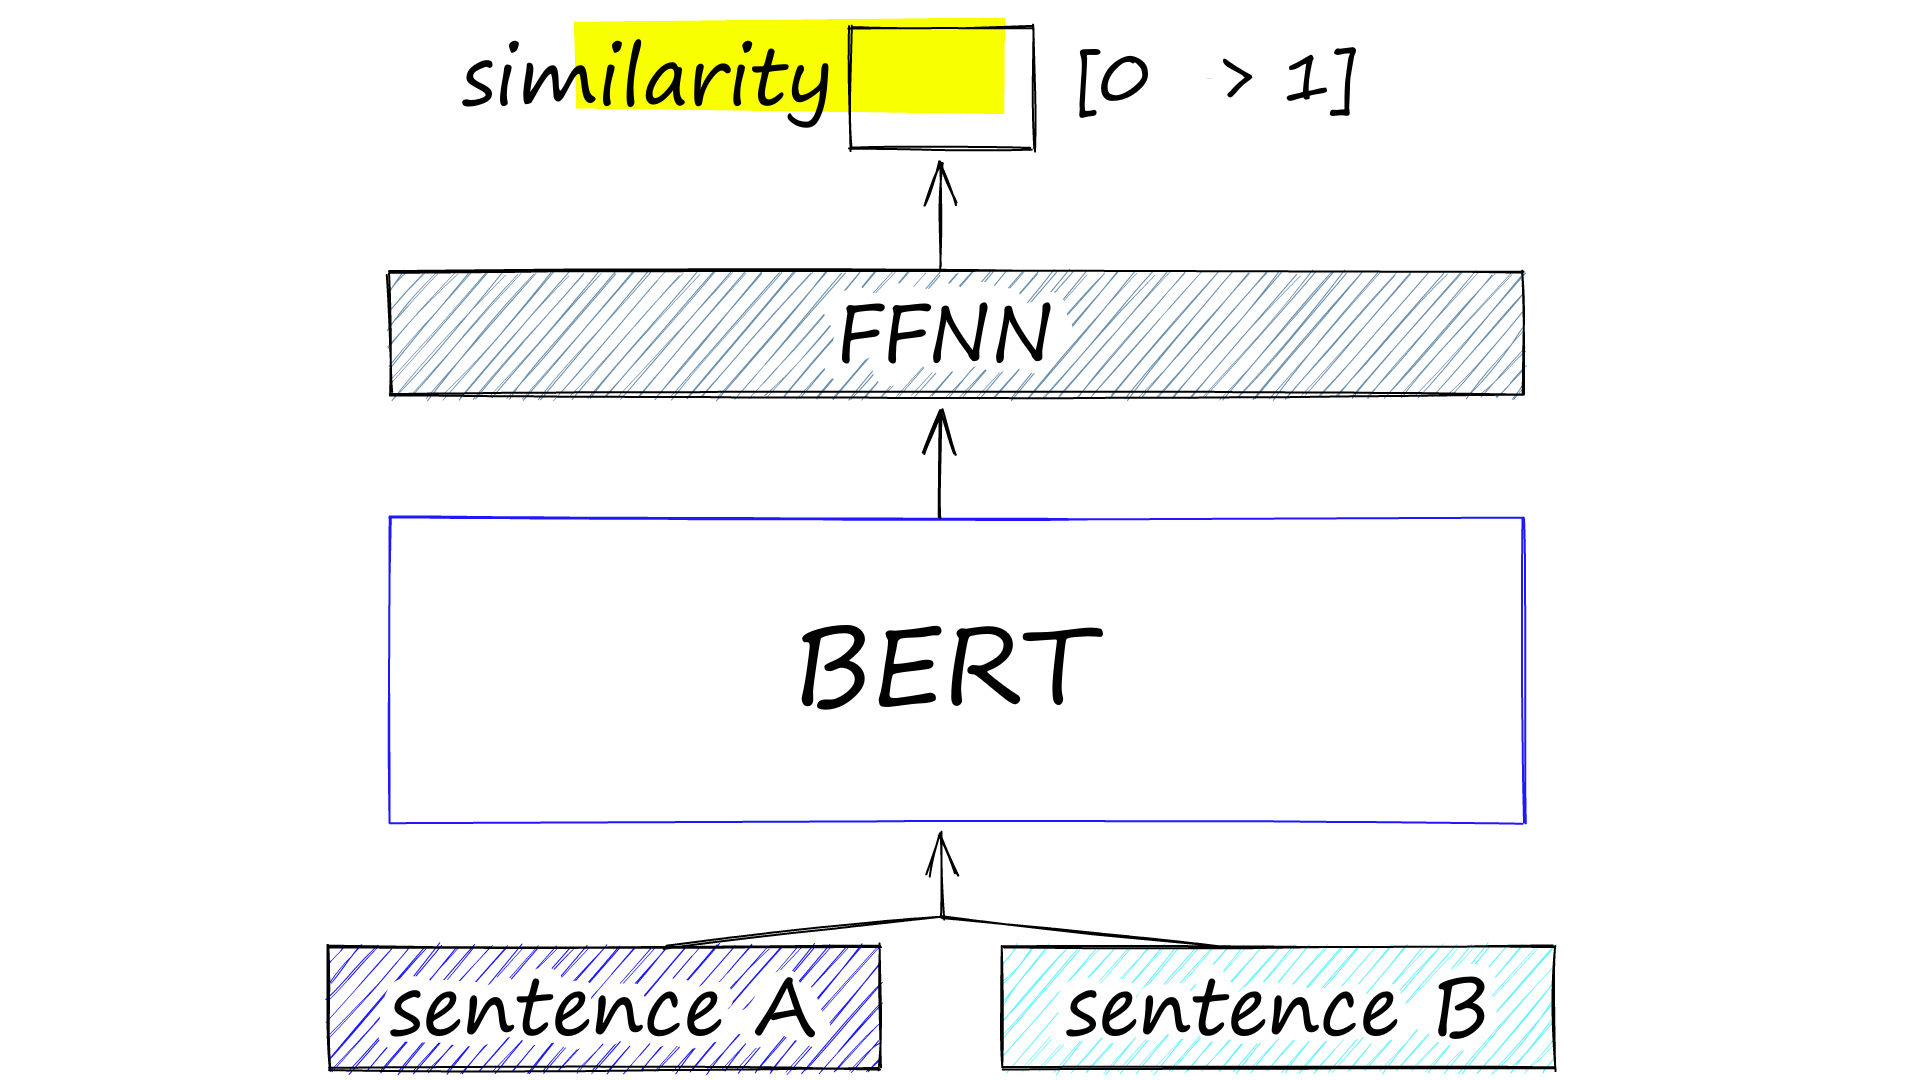

* The cross-encoder network does produce very accurate similarity scores (better than SBERT), but it’s not scalable. If we wanted to perform a similarity search through a small 100K sentence dataset, we would need to complete the cross-encoder inference computation 100K times.

* To cluster sentences, we would need to compare all sentences in our 100K dataset, resulting in just under 500M comparisons — this is simply not realistic.

* Ideally, we need to pre-compute sentence vectors that can be stored and then used whenever required. If these vector representations are good, all we need to do is calculate the cosine similarity between each.

* With the original BERT (and other transformers), we can build a sentence embedding by averaging the values across all token embeddings output by BERT (if we input 512 tokens, we output 512 embeddings). Alternatively, we can use the output of the first [CLS] token (a BERT-specific token whose output embedding is used in classification tasks).

* Using one of these two approaches gives us our sentence embeddings that can be stored and compared much faster, shifting search times from 65 hours to around 5 second. However, the accuracy is not good, and is worse than using averaged GloVe embeddings (which were developed in 2014).

The **solution** to this lack of an accurate model with reasonable latency was designed by Nils Reimers and Iryna Gurevych in 2019 with the introduction of sentence-BERT (SBERT) and the sentence-transformers library.


# Sentence Transformers

* The role of Sentence Transformer is simply to encode text infomation based on it's semantics. The advantage is we have fewer model passes as compared to other Transformer models.

* Here Sentence transformer model doesn't direct produce the probability, instead it produces vectors and then it use similarity measures, a metric to calculate how similar two vectors are such as Cosine similarity.

* This results get a score ranging between 0 & 1.

So we train model to ouput vectors such that when two inputs are similar, then these vectors have high similarity and are close to each other.


To better understand the functioning on the Sentence Transformers , we could consider fig.S-Bert model.

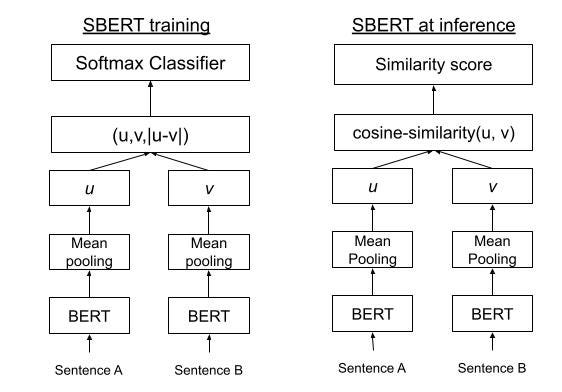

**In the Training section:**
1. We feed the input sentence or text into a transformer network like BERT.
2. BERT produces contextualized word embeddings for all input tokens in our text.
3. As we want a fixed-sized output representation (vector u), we need a pooling layer. Different pooling options are available, the most basic one is mean-pooling: We simply average all contextualized word embeddings BERT is giving us.

**At inference:**
1. For each sentence pair, we pass sentence A and sentence B through our network which yields the embeddings u und v.
2. The similarity of these embeddings is computed using cosine similarity and the result is compared to the gold similarity score.
3. This allows our network to be fine-tuned and to recognize the similarity of sentences.

**Loss Functions:** https://arxiv.org/abs/1908.10084

The loss function plays a critical role when fine-tuning the model. It determines how well our embedding model will work for the specific downstream task.

The most simple way is to have sentence pairs annotated with a score indicating their similarity, e.g. on a scale 0 to 1. We can then train the network with a Siamese Network Architecture (Sentence-BERT).

# Dataset Preparation

In [1]:
! pip install arxiv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=8c385214fab4a81dee22829bc376fe3e71e2213683aaaa7b3e96112b4e24307f
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


# Downloading k PDFs from arxiv.org

Following a user- specified search query and chunking them into individual paragraphs

In [2]:
import arxiv
import pandas as pd

search = arxiv.Search(
  query = "artificial intelligence",
  max_results = 10,
  sort_by = arxiv.SortCriterion.SubmittedDate
)
for result in search.results():
  print(result.title)
  result.download_pdf()


ForceSight: Text-Guided Mobile Manipulation with Visual-Force Goals
LLM-Grounder: Open-Vocabulary 3D Visual Grounding with Large Language Model as an Agent
Rehearsal: Simulating Conflict to Teach Conflict Resolution
LongLoRA: Efficient Fine-tuning of Long-Context Large Language Models
Environment-biased Feature Ranking for Novelty Detection Robustness
See to Touch: Learning Tactile Dexterity through Visual Incentives
Learning to Drive Anywhere
The Reversal Curse: LLMs trained on "A is B" fail to learn "B is A"
MetaMath: Bootstrap Your Own Mathematical Questions for Large Language Models
LLMR: Real-time Prompting of Interactive Worlds using Large Language Models


# Working with PDF data

In [4]:
! pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 4.6 MB/s eta 0:00:00


In [5]:
from pypdf import PdfReader
import numpy as np

# Extract text from PDF
def text_extractor():
  global data
  with open(path1, 'rb') as a, open(path2, 'rb') as b, open(path3, 'rb') as c, open(path4, 'rb') as d, open(path5, 'rb') as e, open(path6, 'rb') as f, open(path7, 'rb') as g, open(path8, 'rb') as h, open(path9, 'rb') as k, open(path10, 'rb') as l:
    reader1 = PdfReader(a)
    reader2 = PdfReader(b)
    reader3 = PdfReader(c)
    reader4 = PdfReader(d)
    reader5 = PdfReader(e)
    reader6 = PdfReader(f)
    reader7 = PdfReader(g)
    reader8 = PdfReader(h)
    reader9 = PdfReader(k)
    reader10 = PdfReader(l)

     # Get metadata of the PDF file
    metadata1=reader1.metadata
    print("metadata1:",metadata1)
    print("=====================")
    metadata2=reader2.metadata
    print("metadata2:",metadata2)
    print("=====================")
    metadata3=reader3.metadata
    print("metadata3:",metadata3)
    print("=====================")
    metadata4=reader4.metadata
    print("metadata4:",metadata4)
    print("=====================")
    metadata5=reader5.metadata
    print("metadata5:",metadata5)
    print("=====================")
    metadata6=reader6.metadata
    print("metadata6:",metadata6)
    print("=====================")
    metadata7=reader7.metadata
    print("metadata7:",metadata7)
    print("=====================")
    metadata8=reader8.metadata
    print("metadata8:",metadata8)
    print("=====================")
    metadata9=reader9.metadata
    print("metadata9:",metadata9)
    print("=====================")
    metadata10=reader10.metadata
    print("metadata10:",metadata10)

    # Get Titile of page
    Title1=reader1.metadata.title
    Title2=reader2.metadata.title
    Title3=reader3.metadata.title
    Title4=reader4.metadata.title
    Title5=reader5.metadata.title
    Title6=reader6.metadata.title
    Title7=reader7.metadata.title
    Title8=reader8.metadata.title
    Title9=reader9.metadata.title
    Title10=reader10.metadata.title

    # Get specific page from the pdf file
    page1 = reader1.pages[0]
    page2 = reader2.pages[0]
    page3 = reader3.pages[0]
    page4 = reader4.pages[0]
    page5 = reader5.pages[0]
    page6 = reader6.pages[0]
    page7 = reader7.pages[0]
    page8 = reader8.pages[0]
    page9 = reader9.pages[0]
    page10 = reader10.pages[0]

    # Extracting text from page
    text1 = page1.extract_text()
    text2 = page2.extract_text()
    text3 = page3.extract_text()
    text4 = page4.extract_text()
    text5 = page5.extract_text()
    text6 = page6.extract_text()
    text7 = page7.extract_text()
    text8 = page8.extract_text()
    text9 = page9.extract_text()
    text10 = page10.extract_text()

    # Extract Tilte and Abstract section
    Abstract1=text1.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract2=text2.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract3=text3.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract4=text4.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract5=text5.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract6=text6.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract7=text7.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract8=text8.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract9=text9.split("ABSTRACT")[0].split("1 Introduction")[0]
    Abstract10=text10.split("ABSTRACT")[0].split("1 Introduction")[0]

    # storing the data in list format
    doc=[Abstract1,Abstract2,Abstract3,Abstract4,Abstract5,Abstract6,Abstract7,Abstract8,Abstract9,Abstract10]

    #creating a pandas dataframe
    data = pd.DataFrame(np.array([doc]).T)
    data.columns =['Abstract']
    print(data)

  return data

if __name__ == '__main__':
  # PDF data
  path1="/content/2309.12300v1.See_to_Touch__Learning_Tactile_Dexterity_through_Visual_Incentives.pdf"
  path2="/content/2309.12301v1.Environment_biased_Feature_Ranking_for_Novelty_Detection_Robustness.pdf"
  path3="/content/2309.12276v1.LLMR__Real_time_Prompting_of_Interactive_Worlds_using_Large_Language_Models.pdf"
  path4="/content/2309.12307v1.LongLoRA__Efficient_Fine_tuning_of_Long_Context_Large_Language_Models.pdf"
  path5="/content/2309.12309v1.Rehearsal__Simulating_Conflict_to_Teach_Conflict_Resolution.pdf"
  path6="/content/2309.12311v1.LLM_Grounder__Open_Vocabulary_3D_Visual_Grounding_with_Large_Language_Model_as_an_Agent.pdf"
  path7="/content/2309.12312v1.ForceSight__Text_Guided_Mobile_Manipulation_with_Visual_Force_Goals.pdf"
  path8="/content/2309.12284v1.MetaMath__Bootstrap_Your_Own_Mathematical_Questions_for_Large_Language_Models.pdf"
  path9="/content/2309.12288v1.The_Reversal_Curse__LLMs_trained_on__A_is_B__fail_to_learn__B_is_A_.pdf"
  path10="/content/2309.12295v1.Learning_to_Drive_Anywhere.pdf"

  text_extractor()

metadata1: {'/Author': '', '/CreationDate': 'D:20230922010209Z', '/Creator': 'LaTeX with hyperref', '/Keywords': '', '/ModDate': 'D:20230922010209Z', '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', '/Producer': 'pdfTeX-1.40.25', '/Subject': '', '/Title': '', '/Trapped': '/False'}
metadata2: {'/Author': '', '/CreationDate': 'D:20230922012539Z', '/Creator': 'LaTeX with hyperref', '/Keywords': '', '/ModDate': 'D:20230922012539Z', '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', '/Producer': 'pdfTeX-1.40.25', '/Subject': '', '/Title': '', '/Trapped': '/False'}
metadata3: {'/CreationDate': 'D:20230922010715Z', '/Creator': 'LaTeX with hyperref', '/ModDate': 'D:20230922010715Z', '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', '/Producer': 'pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version

In [6]:
data

,Abstract
0,See to Touch: Learning Tactile Dexterity throu...
1,Environment-biased Feature Ranking for Novelty...
2,LLMR: Real-time Prompting of Interactive World...
3,LONG LORA: E FFICIENT FINE-TUNING OF LONG -\nC...
4,Rehearsal: Simulating Conflict to Teach Confli...
5,This work has been submitted to the IEEE for p...
6,ForceSight: Text-Guided Mobile Manipulation wi...
7,Technical Report\nMETAMATH: BOOTSTRAP YOUR OWN...
8,The Reversal Curse:\nLLMs trained on “A is B” ...
9,Learning to Drive Anywhere\nRuizhao Zhu Peng H...


# Data preprocessing

* Tokenization: Tokenization is an essential step in NLP that involves breaking down a text into smaller units called tokens. Depending on the specific task and requirements, these tokens can be words, sentences, or subwords. Here as we are working on sentence level NLP application, we will be using sentence tokenizer.

*   sentence tokenizer: In NLP, tokenization is used to divide a string into a list of tokens. Tokens come in handy when finding valuable patterns and helping to replace sensitive data components with non-sensitive ones. we can tokenize with the help of the Natural Language Toolkit (NLTK) library and sent_tokenize function can tokenize inserted text into sentences.

* Lemmatization: Lemmatization is similar to stemming, used to stem the words into root word but differs in working. It is a systematic way to reduce the words into their lemma by matching them with a language dictionary.

* Remove Stopwords: Stopwords are the most commonly occurring words in a text which do not provide any valuable information. stopwords like they, there, this, where, etc are some of the stopwords. NLTK library is a common library that is used to remove stopwords and include approximately 180 stopwords which it removes. If we want to add any new word to a set of words then it is easy using the add method.

*   Punctuation Removal: In this step, all the punctuations from the text are removed.

* Eliminated the punctuation URL, digits, @ and special characters

In [7]:
# sentence tokenizer

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

sentences = []
for row in data.itertuples():
    for sentence in sent_tokenize(row[1]):
        sentences.append(sentence)
new_df = pd.DataFrame(sentences, columns=['Abstract'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# Text preprocesing
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
stop_words.add('e-mail:')
stop_words.add('(e-mail:')
stop_words.add('@')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# preprocesing
def preprocess(sentence):
  sentence=str(sentence)
  text_sp = sentence.split()
  sentence=re.sub(r"[\(\[]*?[\)\]]", '', sentence)   # Remove the [] and the ()
  sentence=(re.sub(r'[!:;-](?= |$)','',sentence))    # Remove special characters
  sentence=re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http+?", '', sentence) # eliminate the punctuation, URL, and @
  sentence=re.sub(r"(\d+)",'',sentence)              # Remove digits
  sentence=" ".join([word for word in str(sentence).split() if word not in stop_words])

  return "".join(sentence)

new_df['Abstract'] = new_df['Abstract'].apply(lambda x: remove_stopwords(x))
new_df['clean_Abstract']=new_df['Abstract'].map(lambda s:preprocess(s))
new_df["clean_Abstract"] = new_df["clean_Abstract"].apply(lambda text: lemmatize_words(text))
new_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Abstract,clean_Abstract
0,See Touch: Learning Tactile Dexterity Visual I...,See Touch Learning Tactile Dexterity Visual In...
1,"However, relying solely tactile sensing fails ...",However relying solely tactile sensing fails p...
2,"In paper, present Tactile Adaptation Visual In...",In paper present Tactile Adaptation Visual Inc...
3,"First, use contrastive-based objective learn v...",First use contrastivebased objective learn vis...
4,"Next, construct reward function using visual r...",Next construct reward function using visual re...
...,...,...
189,Our key insight introduce high-capacity geo-lo...,Our key insight introduce highcapacity geoloca...
190,"By optimizing contrastive imitation objective,...",By optimizing contrastive imitation objective ...
191,We demonstrate benefits AnyD agent across mult...,We demonstrate benefit AnyD agent across multi...
192,"Specifically, AnyD outperforms CIL baselines 1...",Specifically AnyD outperforms CIL baseline ope...


# Sentence Transformers

In [9]:
! pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d3e6c295ad3ba0b4777664634a6d343b0ed838b3425235cc2e72a6c07922e503
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


# Semantic Search Modelling

* Sentence Transformers  library: This framework provides an easy method to compute dense vector representations for sentences and paragraphs.
The models are based on transformer networks like BERT / RoBERTa / XLM-RoBERTa etc. and achieve state-of-the-art performance in various tasks. Text is embedded in vector space such that similar text are closer and can efficiently be found using cosine similarity.

* Embedding: The embedding is an information dense representation of the semantic meaning of a piece of text. Each embedding is a vector of floating point numbers, such that the distance between two embeddings in the vector space is correlated with semantic similarity between two inputs in the original format.

In [10]:
from sentence_transformers import SentenceTransformer, util
import torch

# Model
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

# Corpus of documents and their embeddings
corpus=new_df['clean_Abstract']
corpus_embeddings = model.encode(corpus)

# Query and their embeddings:
queries = ['use of reinforcement learning in robot optimization',
           'who developed Large Language Model',
           'how neural architecture proposes bounding box',
           'what is zeroshot transfer capability in LLM',
           'how computer vision for autonomous driving helps',
           'what is LiDAR sensing technology',
           'what suggests research in AI',
           'Rehearsal system allows user',
           'what decompose complex natural language query',
           'what are the problems leveraging LLM',
           'how RGBD images detected by camera',
           'how to evaluate ChatGPT',
           'how to build Autonomous Driving system']

query_embedding = model.encode(queries)

# Symmetric vs. Asymmetric Semantic Search

There is a critical distinction for we're setup is symmetric vs. asymmetric semantic search:
* For symmetric semantic search your query and the entries in our corpus are of about the same length and have the same amount of content.

* For asymmetric semantic search, we usually have a short query (like a question or some keywords) and we want to find a longer paragraph answering the query.
* It is critical that we choose the right model and queries for our type of task.

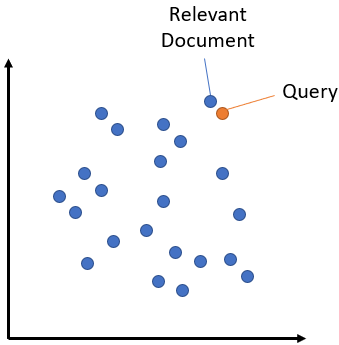

In [11]:
#Cosine similarity between query and corpus
cos_sim=util.cos_sim(query_embedding, corpus_embeddings)
cos_sim

tensor([[ 0.3612,  0.1981,  0.2616,  ...,  0.2737,  0.0311,  0.2608],
        [ 0.1758,  0.0636,  0.0603,  ...,  0.1412,  0.0165,  0.2502],
        [ 0.1979,  0.2615,  0.2066,  ...,  0.1357,  0.0595,  0.0971],
        ...,
        [ 0.0906,  0.1463,  0.0540,  ...,  0.0470,  0.0166,  0.0538],
        [ 0.0971,  0.1109,  0.0575,  ...,  0.0122,  0.2048,  0.0046],
        [ 0.2032,  0.0828,  0.1194,  ...,  0.1652, -0.0292,  0.4366]])

In [13]:
#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append((cos_sim[i][j], i, j))
all_sentence_combinations[:10]

[(tensor(0.1981), 0, 1),
 (tensor(0.2616), 0, 2),
 (tensor(0.1316), 0, 3),
 (tensor(0.4084), 0, 4),
 (tensor(0.6987), 0, 5),
 (tensor(0.3050), 0, 6),
 (tensor(0.3526), 0, 7),
 (tensor(0.3241), 0, 8),
 (tensor(0.2808), 0, 9),
 (tensor(0.3014), 0, 10)]

In [14]:
# Semantic search: Find the top-5 corpus documents matching each query
hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)

# Print results of first query
print(f"Query: {queries[0]}")
for hit in hits[0]:
  print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

Query: use of reinforcement learning in robot optimization
Finally use online reinforcement learning robot optimize tactilebased policy maximize visual reward (Score: 0.6987)
R ELATED WORK Imitation learning widely adopted robotics enabling robot learn human demonstration complex task (Score: 0.4915)
In approach human first teleoperate robot collect demonstration dexterous behavior (Score: 0.4668)
To train dexterous policy several framework proposed ranging modelbased control mod el robot object used optimize control behavior simulationtoreality transfer simreal policy trained simulator transferred real world (Score: 0.4413)
Prior work demonstrated deep model outputting humaninterpretable kinematic goal enable dexterous manipulation real robot (Score: 0.4371)


In [15]:
# Print results of second query
print(f"Query: {queries[1]}")
for hit in hits[1]:
  print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

Query: who developed Large Language Model
Technical Report METAMATH BOOTSTRAP YOUR OWNMATHEMATICAL QUESTIONS FOR LARGE LANGUAGE MODELS Longhui YuWeisen JiangHan ShiJincheng YuZhengying Liu Yu ZhangJames T KwokZhenguo LiAdrian WellerWeiyang Liu Peking UniversitySouthern University Science Technology Hong Kong University Science TechnologyHuawei Noahs Ark LabCambridge University The Alan Turing InstituteMax Planck Institute Intelligent Systems T ubingen Project Page (Score: 0.5656)
Examples diverse use case functionality enabled Large Language Model Mixed Reality LLMR (Score: 0.5589)
We propose address problem leveraging large language model LLM (Score: 0.5560)
LLMR Realtime Prompting Interactive Worlds using Large Language Models FERNANDA DE LA TORREMassachusetts Institute Technology USA Microsoft USA CATHY MENGYING FANGMassachusetts Institute Technology USA Microsoft USA HAN HUANGRensselaer Polytechnic Institute USA Microsoft USA ANDRZEJ BANBURSKIFAHEY Microsoft USA JUDITH AMORES FERNA

In [16]:

# Print results of third query
print(f"Query: {queries[2]}")
for hit in hits[2]:
  print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

Query: how neural architecture proposes bounding box
One direction train Dandtext endtoend neural architecture propose bound ing box around object jointly model textbounding box matching (Score: 0.6837)
Abstract We present ForceSight system textguided mobile manipulation predicts visualforce goal using deep neural network (Score: 0.3521)
In general grip force The author Institute Robotics Intelligent Machines Georgia Institute Technology GT (Score: 0.3496)
Prior work demonstrated deep model outputting humaninterpretable kinematic goal enable dexterous manipulation real robot (Score: 0.3406)
The kinematic goal specifies target configuration endeffector D position yaw angle distance fingertip (Score: 0.3292)


In [17]:
# Print results of fourth query
print(f"Query: {queries[3]}")
for hit in hits[3]:
  print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

Query: what is zeroshot transfer capability in LLM
We evaluate LLMGrounder ScanRefer benchmark demonstrate stateoftheart zero Equal contribution (Score: 0.3548)
Our finding indicate LLMs significantly improve grounding capability especially complex language query making LLMGrounder effective approach D visionlanguage task robotics (Score: 0.2894)
The LLM evaluates spatial commonsense relation among proposed object make final grounding decision (Score: 0.2798)
These additional capability facilitate wider range task realworld scenario however also result higher dimensional action (Score: 0.2722)
While existing approach often rely extensive labeled data exhibit limitation handling complex language query propose LLMGrounder novel zeroshot openvocabulary Large Language Model LLMbased D visual grounding pipeline (Score: 0.2515)


# Topic modeling with Transformers: BERTopic
* Goal to create a model that can automatically categorize the documents by their topics.

* Topic modeling is an unsupervised learning technique that automatically identifies different topics present in a document (textual data). It focuses on understanding which topics a given text is about and discovery of concealed semantic structures within a body of text.

* There are different techniques to perform topic modeling such as non-negative matrix factorization (NMF), latent dirichlet allocation (LDA) and sparse principal components analysis (sparse PCA).

* In this work, we will be using the BerTopic technique developed by Maarten Grootendorst.

* **BerTopic** is a topic modeling technique that uses transformers (BERT embeddings) and class-based TF-IDF to create dense clusters. It also allows you to easily interpret and visualize the topics generated.

* BerTopic algorithm contains 3 stages:

1. Embed the textual data:Here, the algorithm extracts document embeddings with BERT and we will be using sentence transformers pre-trained model-
* "paraphrase-MiniLM-L6-v2", which is an English BERT-based model.
* "paraphrase-multilingual-MiniLM-L12-v2", which work for 50+ languages.

2. Cluster Documents: It uses UMAP to reduce the dimensionality of embeddings and the HDBSCAN technique to cluster reduced embeddings and create clusters of semantically similar documents.

3. Create a topic representation: To extract and reduce topics with class-based TF-IDF and then improve the coherence of words with Maximal Marginal Relevance.

In [18]:
# BerTopic Lib
! pip install bertopic[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039158 sha256=4d2e10eaed4168debbcb7db55db37d3c071fb9bc122bf58fabb5d14756ebf4f7
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-an

In [19]:
#import packages
import pandas as pd
import numpy as np
from bertopic import BERTopic

# create model
model = BERTopic(verbose=True)

#convert to list
topic_data=new_df.copy()
docs = topic_data.clean_Abstract.to_list()

# Model fitting
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

2023-09-22 05:05:05,701 - BERTopic - Transformed documents to Embeddings
2023-09-22 05:05:16,100 - BERTopic - Reduced dimensionality
2023-09-22 05:05:16,112 - BERTopic - Clustered reduced embeddings


In [20]:
# Select Top Topics- After training the model, we can access the size of topics in descending order.
print(model.get_topic_freq().head(11))

   Topic  Count
0      0    169
2      1     16
1     -1      9


In [21]:
# We can select a specific topic and get the top n words for that topic and their c-TF-IDF scores.
print(model.get_topic(0))

[('model', 0.036996812041947436), ('usa', 0.03403706707859164), ('object', 0.03206319227938308), ('we', 0.03206319227938308), ('visual', 0.030862112663068077), ('goal', 0.03046003266541393), ('task', 0.029639758251221435), ('policy', 0.02583195652651187), ('force', 0.024510568824369902), ('data', 0.024510568824369902)]


For this selected topic, common words are parameter, learning,prediction, computational. It is obvious this topic focuses on Machine Learning.

# Topic Modeling Visualization:
BerTopic allows you to visualize the topics that were generated in a way very similar to LDAvis.

In [23]:
# model.visualize_topics()

The visualize_topics method can help you visualize topics generated with their sizes and corresponding words.

In [24]:
model.visualize_barchart()

The visualize_barchart method will show the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores. You can then compare topic representations to each other and gain more insights from the topic generated.

# Visualize Topic Similarity

In [25]:
model.visualize_heatmap()

# Final Thoughts

In this work, I have developed End-To-End semantic search NLP application using Sentence Transformer library and implemented topic modelling utilising BERTopic by leveraging Transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

We started from scratch by importing, cleaning and processing the arxiv.org dataset to build the semantic search model. We walked through some potential ways to Data Preparation and modelling strategies:-

* woking and handling PDF dataset
* Tokenization in particularly sentence tokenizer
* Lemmatization
* Data Cleaning - Removeing Stopwords, Removing HTML Tags, email, links and Eliminated the punctuation. Alongside the methods used above for data preparation, there are also other types of tokenizers and text cleaning techniques that can allow different word/sentences combinations or employ more strict tactics for determining corpus vocabulary.

* In semantic search modelling with Sentence Transformers library - I've used cosine similarity measure for Semantic Textual Similarity for comparing and computing sentence embeddings to each other. Here, I have show how we can compute the cosine similarity between embeddings, for example, to measure the semantic similarity of two texts.

* In Topic modeling - With topic modeling, I've developed cluster words for a set of documents and this is unsupervised learning, because it automatically groups words without a predefined list of labels.
We've seen Transformers, UMAP, HDBSCAN, and c-TF-IDF are clearly powerful components that have huge applications when working with unstructured text data. BERTopic has abstracted away much of the complexity of this stack, allowing us to apply these technologies with nothing more than a few lines of code. Although BERTopic can be simple, we have seen that it is possible to dive quite deeply into the individual components. With a high-level understanding of those components, I fill I can greatly improve mu topic modeling performance. BerTopic has a lot of features to offer when creating the model.

* Visualizations - Topic modeling is useful, but it’s difficult to understand it just by looking at a combination of words and numbers and Evaluating topic models can be rather complex due to the somewhat subjective nature of evaluation. I believe, one of the most effective ways to understand data is through visualization, Visualizing different aspects of the topic model helps in understanding the model and makes it easier to tweak the model to our liking.